In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os.path

In [3]:
# out_path = "/work/scratch/malinoro/simulation_copula/out/"
out_path = "/Users/roman/Code/simulation_copula/out"

## Multiple figures

In [4]:
def plot_possibilities(a, b):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))

    axes[0].scatter(range(len(a)), a.values(), marker='+', s=10*mpl.rcParams['lines.markersize'] ** 2, c="blue")
    axes[0].set_title("X poss")
    
    axes[0].set_xticks(ticks=range(len(a)))
    axes[0].set_xticklabels(labels=list(a.keys()))
    axes[0].set_yticks(ticks=list(a.values()))
    axes[0].set_yticklabels(labels=list(a.values()))
    
    
    axes[1].scatter(range(len(b)), b.values(), marker='+', s=10*mpl.rcParams['lines.markersize'] ** 2, c="orange")
    axes[1].set_title("Y poss")
    
    axes[1].set_xticks(ticks=range(len(b)))
    axes[1].set_xticklabels(labels=list(b.keys()))
    axes[1].set_yticks(ticks=list(b.values()))
    axes[1].set_yticklabels(labels=list(b.values()))
    
    if order_a is not None or order_b is not None:
        for k in order_a.keys():
            for i in [int(i) for i in "".join(k.split(",")).split("x") if i!=""]:
                axes[2].plot([i-0.5,i+0.5], order_a[k], c="blue")
        axes[2].set_title("X Order")
        
        for k in order_b.keys():
            for i in [int(i) for i in "".join(k.split(",")).split("x") if i!=""]:
                axes[3].plot([i-0.5,i+0.5], order_b[k], c="orange")
        axes[3].set_title("Y Order")
    
    fig.show()
    
    
def plot_possibilities(a, b, order_a, order_b):
    
    fig, axes = plt.subplots(2, 2, figsize=(15,10))

    axes[0,0].scatter(range(len(a)), a.values(), marker='+', s=10*mpl.rcParams['lines.markersize'] ** 2, c="blue")
    axes[0,0].set_title("X poss")
    
    axes[0,0].set_xticks(ticks=range(len(a)))
    axes[0,0].set_xticklabels(labels=list(a.keys()))
    axes[0,0].set_yticks(ticks=list(a.values()))
    axes[0,0].set_yticklabels(labels=list(a.values()))
    
    
    axes[0,1].scatter(range(len(b)), b.values(), marker='+', s=10*mpl.rcParams['lines.markersize'] ** 2, c="orange")
    axes[0,1].set_title("Y poss")
    
    axes[0,1].set_xticks(ticks=range(len(b)))
    axes[0,1].set_xticklabels(labels=list(b.keys()))
    axes[0,1].set_yticks(ticks=list(b.values()))
    axes[0,1].set_yticklabels(labels=list(b.values()))
    
    for k in order_a.keys():
        for i in [int(i) for i in "".join(k.split(",")).split("x") if i!=""]:
            axes[1,0].plot([i-0.5,i+0.5], [order_a[k]]*2, c="blue")
    axes[1,0].set_title("X Order")
    axes[1,0].set_xticks(ticks=range(1, len(a)+1))
    axes[1,0].set_xticklabels(labels=list(a.keys()))
    axes[1,0].set_yticks(ticks=list(order_a.values()))
    axes[1,0].set_yticklabels(labels=list(order_a.values()))

    for k in order_b.keys():
        for i in [int(i) for i in "".join(k.split(",")).split("y") if i!=""]:
            axes[1,1].plot([i-0.5,i+0.5], [order_b[k]]*2, c="orange")
    axes[1,1].set_title("Y Order")
    axes[1,1].set_xticks(ticks=range(1, len(b)+1))
    axes[1,1].set_xticklabels(labels=list(b.keys()))
    axes[1,1].set_yticks(ticks=list(order_b.values()))
    axes[1,1].set_yticklabels(labels=list(order_b.values()))
    
    fig.show()
    
def generator_lines(df):
    atoms = [k[1] for k in df.columns if k[0]=="poss"]
    keys_x = [k for k in atoms if "x" in k]
    keys_y = [k for k in atoms if "y" in k]
    
    for k in df.index:
        poss_x = {i: df.loc[k, ("poss", i)] for i in keys_x}
        poss_y = {i: df.loc[k, ("poss", i)] for i in keys_y}
        
        order_x = df.loc[k, ("focal_sets", "X")].split("<")
        order_x = {order_x[i]: i + 1 for i in range(len(order_x))}
        
        order_y = df.loc[k, ("focal_sets", "Y")].split("<") 
        order_y = {order_y[i]: i + 1 for i in range(len(order_y))}
        yield [poss_x, poss_y, order_x, order_y] 

In [6]:
df = pd.read_csv(os.path.join(out_path, "backup", "random_orders_N3.csv"), header=[0,1], index_col=[0,1])

[{'x1': 0.14, 'x2': 0.95, 'x3': 0.31, 'x4': 1.0}, {'y1': 1.0, 'y2': 0.81, 'y3': 0.09, 'y4': 0.6}, {'x1,x2,x3,x4': 1, 'x2,x3,x4': 2, 'x2,x4': 3, 'x4': 4}, {'y1': 1, 'y1,y2': 2, 'y1,y2,y3,y4': 3, 'y1,y2,y4': 4}]


/var/folders/kn/x94nsr4955n7vthghm5m3mfw0000gn/T/ipykernel_53139/3157920535.py:75: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


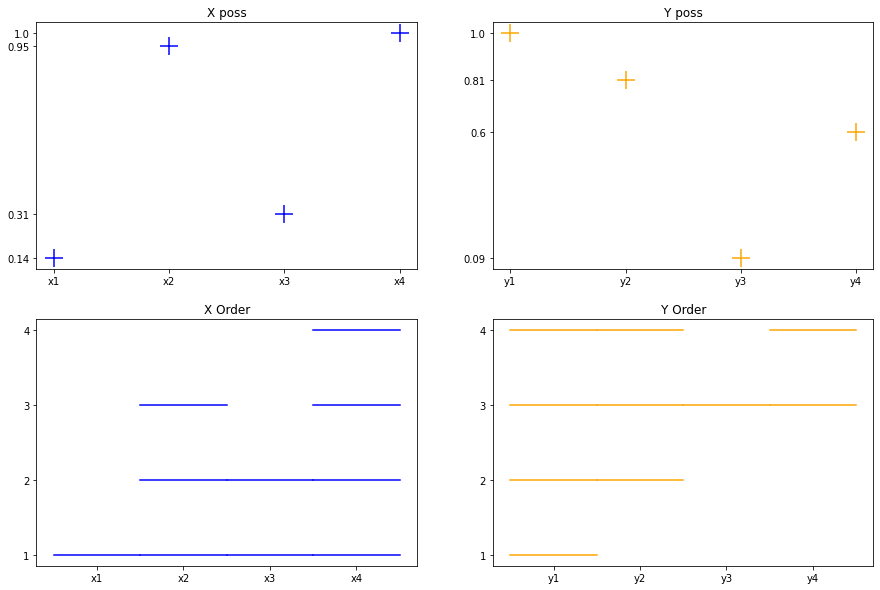

In [20]:
gen = generator_lines(df)

for _ in range(len(df)):
    g = next(gen)
    print(g)
    plot_possibilities(g[0], g[1], g[2], g[3])
    break
    

# Analyse if df have the same possibilities 

In [165]:
df_1 = pd.read_csv(os.path.join(out_path, "random_orders_N4_min.csv"), header=[0,1], index_col=[0,1])
df_2 = pd.read_csv(os.path.join(out_path, "random_orders_N4.csv"), header=[0,1], index_col=[0,1])

In [160]:
# Sorting the dataframe in order to create an lexical order. This improve performants when locating data  later on

df_1 = df_1.sort_values(by=["Object", "Space"], axis=1) 
df_2 = df_2.sort_values(by=["Object", "Space"], axis=1) 

In [17]:
unique_poss_1 = df_1.xs(key=0, level="order", axis=0, drop_level=False).drop(axis=1, columns=["focal_sets"])
unique_poss_2 = df_2.xs(key=0, level="order", axis=0, drop_level=False).drop(axis=1, columns=["focal_sets"])

In [18]:
(unique_poss_1.loc[unique_poss_2.index,:] == unique_poss_2).all().all()

True

# Checking orders

In [161]:
def keep_max_n_orders(df, n=1):
    cross_selection = df.xs(key=n, level="order", axis=0)
    index = df.index.sort_values()
    return index.drop(cross_selection.index, errors='ignore')

def get_max_orders(df):
    poss = df.index.get_level_values(level="poss").drop_duplicates()
    max_index = [max(df.xs(key=k, level="poss", axis=0).index) for k in poss]
    return pd.MultiIndex.from_arrays([poss, max_index])

In [169]:
m1, m2 = get_max_orders(df_1) ,get_max_orders(df_2)
row = []
score = np.inf
for i, j in zip(m1, m2):
    if i[1]**2+j[1]**2<=score:
        score = i[1]**2+j[1]**2
        row += [i[0]]
print(row)

[0, 1, 5, 42]


In [170]:
m1[42], m2[42]

((42, 3), (42, 1))

In [171]:
df_2.loc[(42,),:]

Object  poss                                         \
Space     x1    x2    x3   x4    y1   y2    y3   y4   
order                                                 
0       0.14  0.95  0.31  1.0  0.71  1.0  0.24  1.0   
1       0.14  0.95  0.31  1.0  0.71  1.0  0.24  1.0   

Object                     focal_sets                              
Space                               X                           Y  
order                                                              
0       x1,x2,x3,x4<x2,x3,x4<x2,x4<x4  y1,y2,y3,y4<y1,y2,y4<y2,y4  
1       x4<x2,x4<x2,x3,x4<x1,x2,x3,x4  y2,y4<y1,y2,y4<y1,y2,y3,y4

In [166]:
df_1.loc[(5,),:]

Object  poss                                         \
Space     x1    x2    x3   x4   y1    y2    y3   y4   
order                                                 
0       0.14  0.95  0.31  1.0  1.0  0.92  0.47  1.0   
1       0.14  0.95  0.31  1.0  1.0  0.92  0.47  1.0   
2       0.14  0.95  0.31  1.0  1.0  0.92  0.47  1.0   
3       0.14  0.95  0.31  1.0  1.0  0.92  0.47  1.0   

Object                     focal_sets                              
Space                               X                           Y  
order                                                              
0       x1,x2,x3,x4<x2,x3,x4<x2,x4<x4  y1,y4<y1,y2,y4<y1,y2,y3,y4  
1       x2,x3,x4<x1,x2,x3,x4<x2,x4<x4  y1,y4<y1,y2,y4<y1,y2,y3,y4  
2       x4<x2,x4<x1,x2,x3,x4<x2,x3,x4  y1,y2,y3,y4<y1,y2,y4<y1,y4  
3       x4<x2,x4<x2,x3,x4<x1,x2,x3,x4  y1,y2,y3,y4<y1,y2,y4<y1,y4